## Probabilistic Learning on Manifolds (Simple example in 20 dimensions)

In this example, raw invented data is used as sample input. This is just a user guide to see how the package and algorithm work and see their possible applications.

The input sample included 300 data points and each features a unique vector of some independent variables and some other linearly related variables. The goal is to use PLoM learn the data structure and generate more samples whose key statistics (i.e., mean and covariance) are consistent with the input sample.

### Import python modules

In [1]:
import numpy as np
import random
import time
from math import pi
import pandas as pd
from ctypes import *
%matplotlib notebook
import matplotlib.pyplot as plt
import sys

### Import PLoM modules

In [2]:
sys.path.insert(1, '../../')
from PLoM import *

### Load Data
Data are loaded via a comma-separate value (csv) file. The first row contains column names for all the variables. The following rows are input sample data. Users are expected to specif the csv filename.

2021-09-26 14:52:02.364487  RUNNING-MSG --NEW LOG STARTING FROM THIS LINE-- 
2021-09-26 14:52:02.368493  RUNNING-MSG PLoM: Running directory /home/javigual/Documents/PLoM/RunDir/Example0 initialized. 
2021-09-26 14:52:02.474431  RUNNING-MSG PLoM: database server initialized. 
2021-09-26 14:52:02.474823  RUNNING-MSG PLoM: visualization folder /home/javigual/Documents/PLoM/RunDir/Example0/FigOut initialized. 
2021-09-26 14:52:02.488750  RUNNING-MSG PLoM.load_data: loaded data size = (300, 20). 
2021-09-26 14:52:02.546938  RUNNING-MSG PLoM.initialize_data: current X0 size = (300, 20). 
2021-09-26 14:52:02.547181  RUNNING-MSG PLoM.initialize_data: X0 and X0_size saved to database. 


<IPython.core.display.Javascript object>


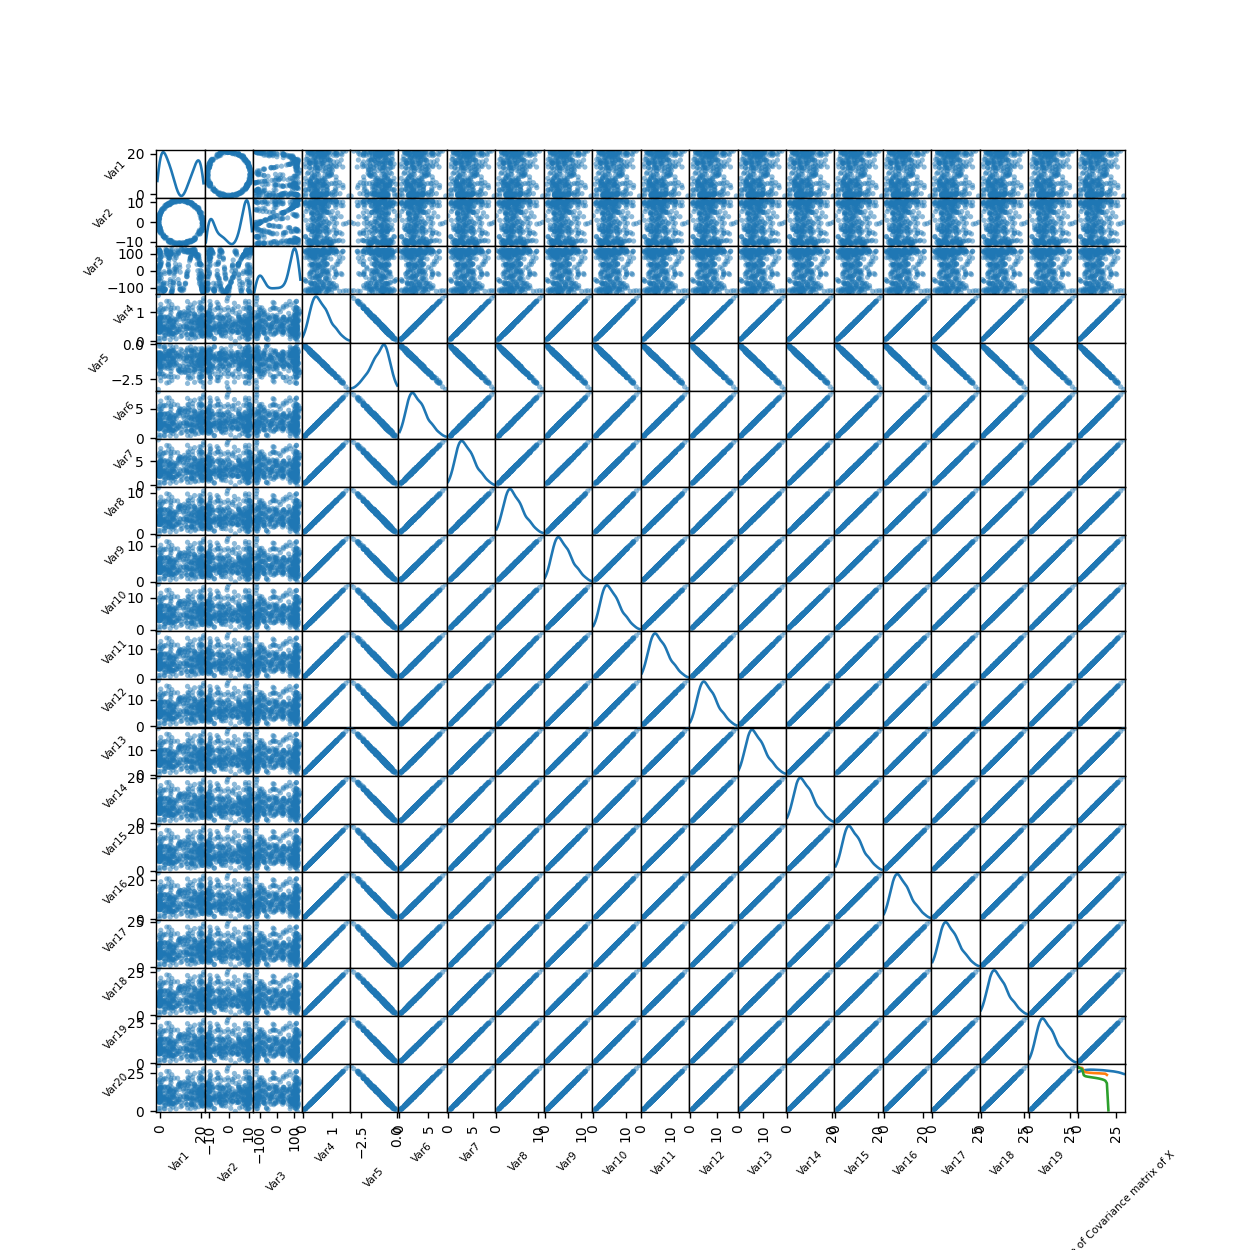

2021-09-26 14:52:31.758954  RUNNING-MSG PLoM: ScatterMatrix_X0.png saved in /home/javigual/Documents/PLoM/RunDir/Example0/FigOut. 
2021-09-26 14:52:31.759266  WARNING-MSG PLoM.add_constraints: no user-defined constraint - please use add_constraints(constraints_file=X) to add new constraints if any. 
2021-09-26 14:52:31.759929  RUNNING-MSG PLoM: using ConfigTasks(task_list = FULL_TASK_LIST) to schedule a run. 
2021-09-26 14:52:31.760311  RUNNING-MSG PLoM: using RunAlgorithm(n_mc=n_mc,epsilon_pca=epsilon_pca,epsilon_kde) to run simulations. 


In [3]:
# Filename
filename = './data/data_example20D.csv'
model = PLoM(model_name='Example0', data=filename, col_header=True, plot_tag=True)

### Configuring tasks
Please specify tasks to run - the list of tasks can be run in sqeunce or invidivdual tasks can be run separately.

In [4]:
tasks = ['DataNormalization','RunPCA','RunKDE','ISDEGeneration']

### Step 0: Scaling the data

In [5]:
# Configure the task
model.ConfigTasks(['DataNormalization'])
# Launch the run
model.RunAlgorithm()

2021-09-26 14:52:31.883987  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: DataNormalization. 
2021-09-26 14:52:31.885785  RUNNING-MSG PLoM.RunAlgorithm: data normalization completed. 
2021-09-26 14:52:31.939484  RUNNING-MSG PLoM.RunAlgorithm: X_range, X_min, X_scaled and X_scaled_mean saved. 
2021-09-26 14:52:31.978293  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) DataNormalization done. 


### Step 1: Principal Component Analysis (PCA)

2021-09-26 14:52:32.165480  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: RunPCA. 
2021-09-26 14:52:32.174108  RUNNING-MSG PLoM.RunPCA: considered number of PCA components = 19 


<IPython.core.display.Javascript object>


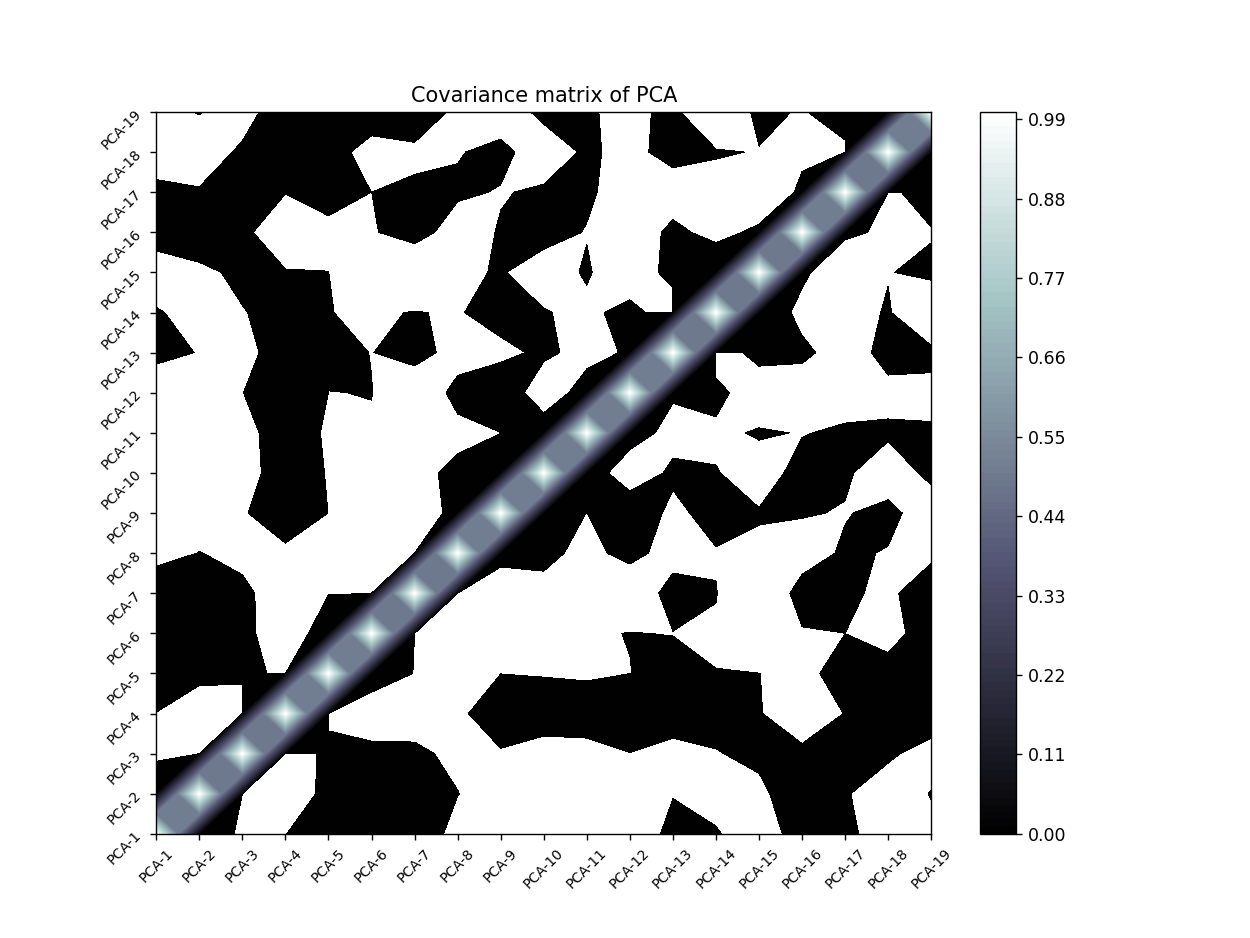

2021-09-26 14:52:33.379247  RUNNING-MSG PLoM: PCA_CovarianceMatrix.png saved in /home/javigual/Documents/PLoM/RunDir/Example0/FigOut. 
2021-09-26 14:52:33.379816  RUNNING-MSG PLoM.RunAlgorithm: PCA completed. 
2021-09-26 14:52:33.431448  RUNNING-MSG PLoM.RunAlgorithm: X_PCA, EigenValue_PCA and EigenVector_PCA saved. 
2021-09-26 14:52:33.485552  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) RunPCA done. 


In [6]:
# Tolerance for truncating principal components
tol_pca = 1e-6
# Configure the task
model.ConfigTasks(['RunPCA'])
# Launch the run
model.RunAlgorithm(epsilon_pca=tol_pca)

### Step 2: Kernel Density Estimation (KDE)

In this step there is an optional argument for the RunAlgorithm process that involves the diffusion maps basis. This step can both be run or not, anddepending on the requirements it can be neglected. It can be noted that the default value of *runDiffMaps* is *True*.

2021-09-26 14:52:33.742278  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: RunKDE. 
2021-09-26 14:52:34.404509  RUNNING-MSG PLoM.RunAlgorithm: kernel density estimation completed. 
2021-09-26 14:52:34.473478  RUNNING-MSG PLoM.RunAlgorithm: KDE, X_KDE and EigenValues_KDE saved. 


<IPython.core.display.Javascript object>


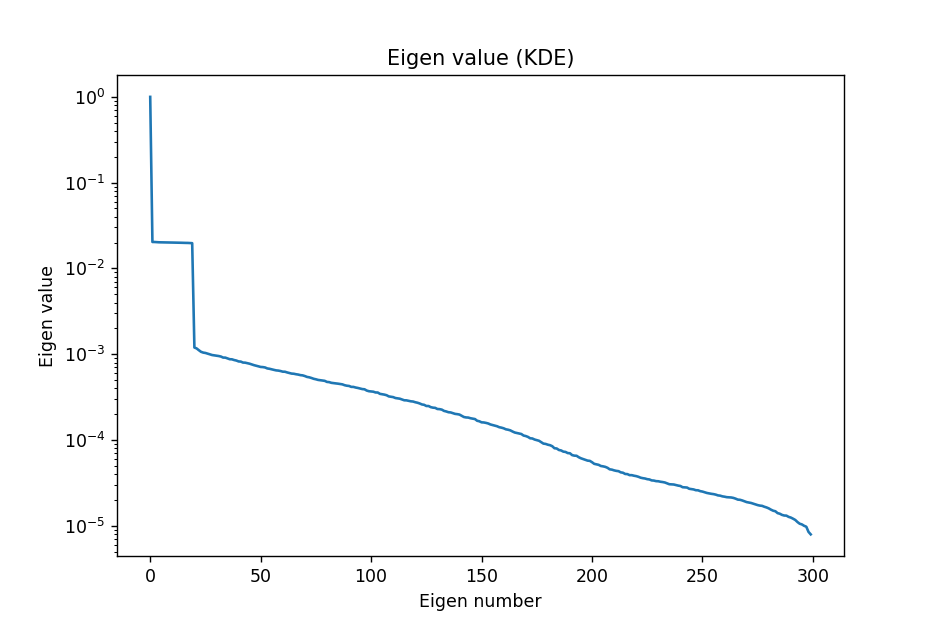

2021-09-26 14:52:35.373026  RUNNING-MSG PLoM: KDE_EigenValue.png saved in /home/javigual/Documents/PLoM/RunDir/Example0/FigOut. 
2021-09-26 14:52:35.374671  RUNNING-MSG PLoM.RunAlgorithm: diffusion maps completed. 
2021-09-26 14:52:35.485397  RUNNING-MSG PLoM.RunAlgorithm: KDE_g, KDE_m, KDE_a and KDE_Z saved. 
2021-09-26 14:52:36.031134  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) RunKDE done. 


In [7]:
# Smoothing parameter in the KDE
sp = 25
# Configure the task
model.ConfigTasks(['RunKDE'])

# Launch the run
model.RunAlgorithm(epsilon_kde=sp)

### Step 3: Create the generator

In [8]:
# Extra parameters for ISDE generation
new_sample_num_ratio = 10
tol_PCA2 = 1e-5
# Configure the task
model.ConfigTasks(['ISDEGeneration'])
# Launch the run
model.RunAlgorithm(n_mc = new_sample_num_ratio, tol_PCA2 = tol_PCA2)

2021-09-26 14:52:37.349305  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: ISDEGeneration. 
delta t:  0.18478391103145078
2021-09-26 14:52:44.185135  RUNNING-MSG PLoM.ISDEGeneration: new generations are simulated. 
2021-09-26 14:52:44.214184  RUNNING-MSG PLoM.RunAlgorithm: Realizations generated. 
2021-09-26 14:52:44.232243  RUNNING-MSG PLoM.RunAlgorithm: X_new saved. 
2021-09-26 14:52:44.324626  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) ISDEGeneration done. 


### Step 4: Exporting data

In [9]:
# Available data list
model.export_results()

2021-09-26 14:52:44.383991  RUNNING-MSG PLoM.export_results: available data /DS_EigenValue_PCA,/DS_EigenValues_KDE,/DS_EigenVector_PCA,/DS_Errors,/DS_KDE_Z,/DS_KDE_a,/DS_KDE_g,/DS_KDE_m,/DS_N,/DS_NumComp_PCA,/DS_X0,/DS_X_KDE,/DS_X_PCA,/DS_X_min,/DS_X_new,/DS_X_range,/DS_X_scaled,/DS_X_scaled_mean,/DS_c_v,/DS_hat_s_v,/DS_n,/DS_s_v,/EigenValue_PCA,/EigenValues_KDE,/EigenVector_PCA,/Errors,/KDE_Z,/KDE_a,/KDE_g,/KDE_m,/N,/NumComp_PCA,/X0,/X_KDE,/X_PCA,/X_min,/X_new,/X_range,/X_scaled,/X_scaled_mean,/basic,/c_v,/constraints_file,/hat_s_v,/n,/s_v. 


In [10]:
# Pick up the original and new realizations, X0 and X_new
model.export_results(data_list=['/X0','/X_new'], file_format_list=['csv','csv'])

2021-09-26 14:52:44.462461  RUNNING-MSG PLoM.export_results: /X0 is exported in /home/javigual/Documents/PLoM/RunDir/Example0/DataOut/X0.csv. 
2021-09-26 14:52:44.581482  RUNNING-MSG PLoM.export_results: /X_new is exported in /home/javigual/Documents/PLoM/RunDir/Example0/DataOut/X_new.csv. 


### Post-processing
We would like to check the basic statistics of the input sample and the generated new realizations by PLoM. The key metrics include the median, standard deviation, and have a look at some plots.

In [11]:
# Load results

#write realtive paths

df_initial = pd.read_csv('../../RunDir/Example0/DataOut/X0.csv')
df_plom = pd.read_csv('../../RunDir/Example0/DataOut/X_new.csv')
print(df_initial.head)
print(df_plom.head)

<bound method NDFrame.head of      Unnamed: 0       Var1       Var2        Var3      Var4      Var5  \
0             0  16.805187  -9.030051  127.664233  0.931982 -1.832991   
1             1  13.248262  10.235868  114.810444  0.431576 -0.902791   
2             2  15.471630   9.770788  121.172821  0.262776 -0.608559   
3             3  13.155974  -9.856282  -17.549627  0.230514 -0.474090   
4             4   5.083361   9.260483  -61.753186  0.746545 -1.491888   
..          ...        ...        ...         ...       ...       ...   
295         295  20.498631   1.915178  -40.365353  0.359852 -0.819206   
296         296  13.277776  10.478213  120.027958  0.601077 -1.168281   
297         297   2.276239   8.325455   91.974155  0.204629 -0.317934   
298         298   6.493595  10.436618  -70.223598  0.260169 -0.439710   
299         299  -0.817857   0.317960 -103.164885  0.490878 -0.890169   

         Var6      Var7      Var8      Var9  ...     Var11      Var12  \
0    4.642449  5.572

<IPython.core.display.Javascript object>


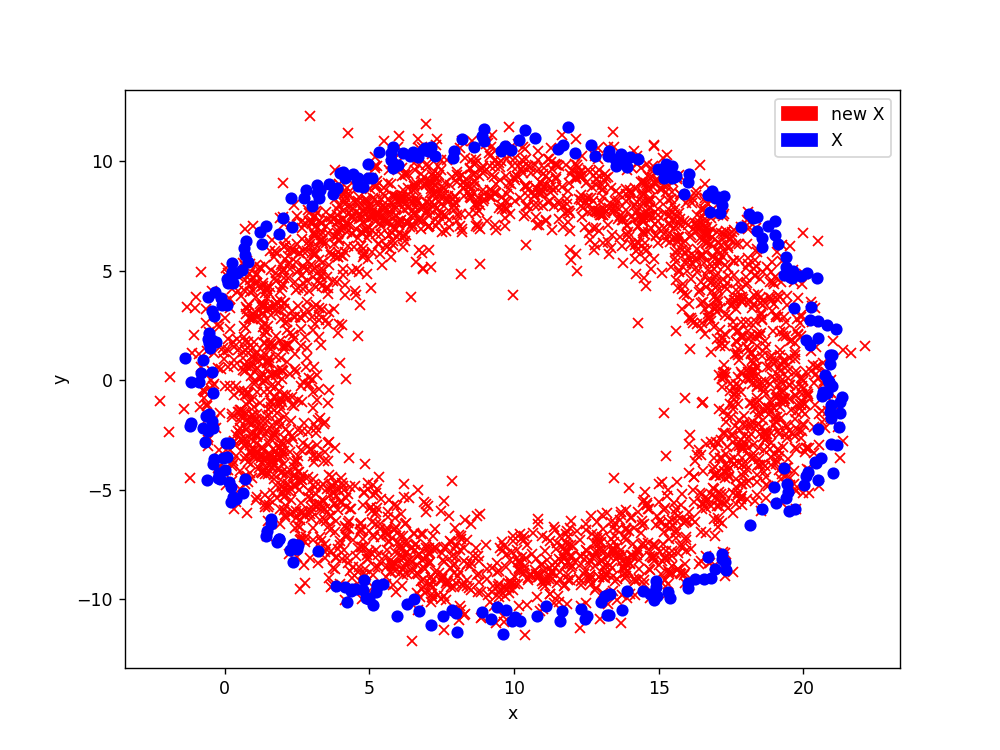

In [12]:
#plot of the first two variables
import matplotlib.patches as mpatches
plt.figure()
plt.plot(df_plom.iloc[:,1].to_numpy(), df_plom.iloc[:,2].to_numpy(), 'rx')
plt.plot(df_initial.iloc[:,1].to_numpy(), df_initial.iloc[:,2].to_numpy(), 'bo')
plt.xlabel('x')
plt.ylabel('y')
red_patch = mpatches.Patch(color='red', label='new X')
blue_patch = mpatches.Patch(color='blue', label='X')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

<IPython.core.display.Javascript object>


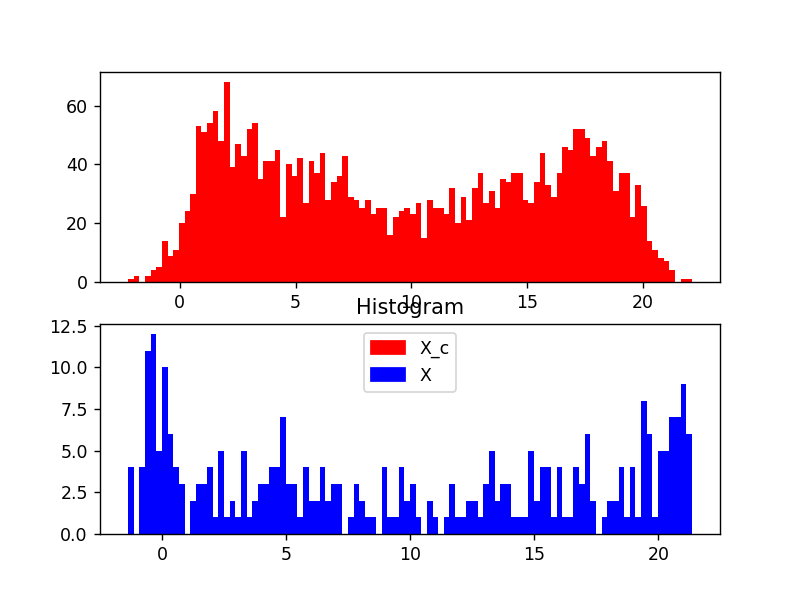

<IPython.core.display.Javascript object>


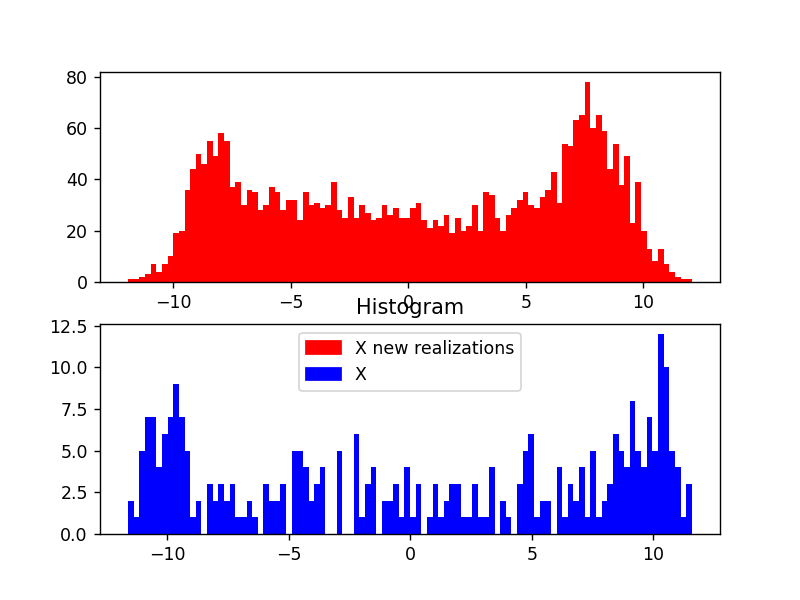

In [14]:
import matplotlib.patches as mpatches
plt.figure()
plt.xlabel('x1')
plt.subplot(2,1,1)
plt.hist(df_plom.iloc[:,1].to_numpy(), bins = 100, color = 'red')
plt.subplot(2,1,2)
plt.hist(df_initial.iloc[:,1].to_numpy(), bins = 100, color = 'blue')
plt.title('Histogram')
red_patch = mpatches.Patch(color='red', label='X_c')
blue_patch = mpatches.Patch(color='blue', label='X')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

import matplotlib.patches as mpatches
plt.figure()
plt.xlabel('x2')
plt.subplot(2,1,1)
plt.hist(df_plom.iloc[:,2].to_numpy(), bins = 100, color = 'red')
plt.subplot(2,1,2)
plt.hist(df_initial.iloc[:,2].to_numpy(), bins = 100, color = 'blue')
plt.title('Histogram')
red_patch = mpatches.Patch(color='red', label='X new realizations')
blue_patch = mpatches.Patch(color='blue', label='X')
plt.legend(handles=[red_patch, blue_patch])
plt.show()